In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set()
np.random.seed(75243)

Funções

In [284]:
def visualizar_graficamente(feature):
  """
  Plotar um gráfico de distribuição e um boxplot para uma determinada feature
  """
  fig, ax = plt.subplots(2,2, figsize=(18,8))

  sns.distplot(feature, ax = ax[0][0])
  ax[0][0].set(xlabel = '', ylabel = 'Frequência')
  ax[0][0].set_title('Média')

  sns.boxplot(feature, ax = ax[0][1])
  ax[0][1].set(xlabel = '')
  ax[0][1].set_title('Distribuição')

  sns.distplot(feature,
               hist_kws = {'cumulative': True},
               kde_kws = {'cumulative': True},
               ax=ax[1][0])
  ax[1][0].set(xlabel = '', ylabel = '% acumulada')
  ax[1][0].set_title('Acumulada')


  plt.ioff()

Importar dados

In [285]:
!curl https://raw.githubusercontent.com/alura-cursos/data-science-introducao-a-testes-estatisticos-com-python/aula01/aula1.2/movies.csv -o movies.csv
!curl https://raw.githubusercontent.com/alura-cursos/data-science-introducao-a-testes-estatisticos-com-python/aula01/aula1.2/ratings.csv -o ratings.csv
!curl https://raw.githubusercontent.com/alura-cursos/data-science-introducao-a-testes-estatisticos-com-python/aula01/aula1.2/tmdb_5000_movies.csv -o tmdb_5000_movies.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  473k  100  473k    0     0  1583k      0 --:--:-- --:--:-- --:--:-- 1583k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2327k  100 2327k    0     0  4951k      0 --:--:-- --:--:-- --:--:-- 4951k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5565k  100 5565k    0     0   9.9M      0 --:--:-- --:--:-- --:--:--  9.9M


In [286]:
tmdb_file = 'tmdb_5000_movies.csv'
ratings_file = 'ratings.csv'
movies_file = 'movies.csv'

In [287]:
df_tmdb_raw = pd.read_csv(tmdb_file)
df_rating_raw = pd.read_csv(ratings_file)
df_movie_raw = pd.read_csv(movies_file)

In [288]:
print(f'df_tmdb_raw: {df_tmdb_raw.shape}')
print(f'df_rating_raw: {df_rating_raw.shape}')
print(f'df_movie_raw: {df_movie_raw.shape}')

df_tmdb_raw: (4803, 20)
df_rating_raw: (100836, 4)
df_movie_raw: (9742, 3)


**Verificando o TMDB 5000**

In [289]:
df_tmdb_raw.head(3).T

,0,1,2
budget,237000000,300000000,245000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/
id,19995,285,206647
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
original_language,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...
popularity,150.438,139.083,107.377
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."


Analisando o que temos com o 'vote_average'

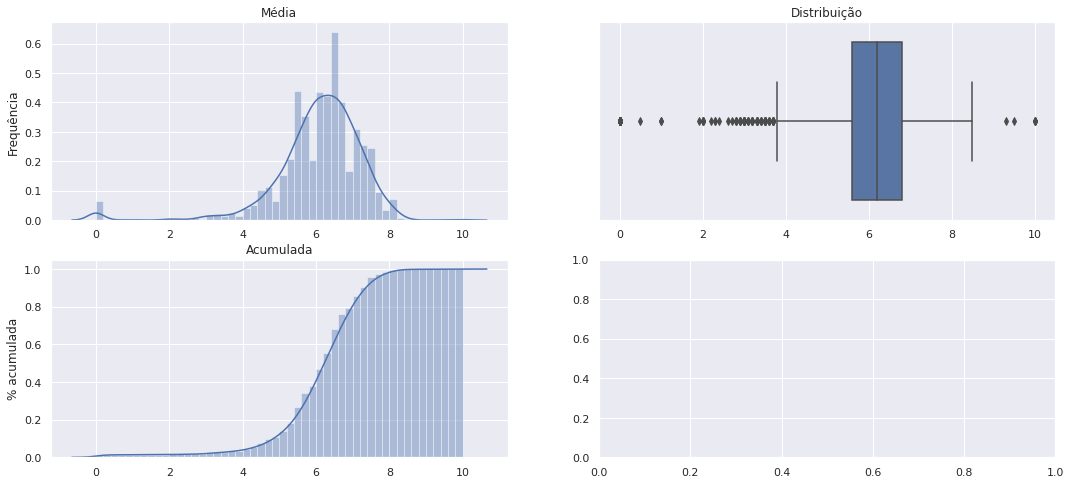

In [290]:
visualizar_graficamente(df_tmdb_raw.vote_average)

Quem são esses valores médios 0 (zero) ?

In [291]:
df_tmdb_raw.query('vote_average == 0').head(5).T

,1464,3669,3670,3852,3855
budget,0,0,0,0,3500000
genres,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 10751, ""name"": ""Family""}]","[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 99, ""name"": ""Documentary""}]"
homepage,NaN,http://www.romeothemovie.com/,NaN,NaN,http://www.timetochoose.com
id,310706,113406,447027,395766,370662
keywords,[],[],[],"[{""id"": 11162, ""name"": ""miniseries""}]","[{""id"": 2210, ""name"": ""climate change""}, {""id""..."
original_language,en,en,en,en,en
original_title,Black Water Transit,Should've Been Romeo,Running Forever,The Secret,Time to Choose
overview,In this action thriller set in post-Katrina Ne...,"A self-centered, middle-aged pitchman for a po...",After being estranged since her mother's death...,The Secret is the story of a real-life double ...,Academy Award® winning director Charles Fergus...
popularity,0.126738,0.40703,0.028756,0.042346,1.61814
production_companies,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]",[],"[{""name"": ""Representational Pictures"", ""id"": 8..."


In [292]:
df_tmdb_raw.query('vote_count < 10')['id'].count()

411

Temos alguns casos que não tiveram votos ou tiveram poucos votos

In [293]:
df_tmdb = df_tmdb_raw.query('vote_count >= 10').copy()

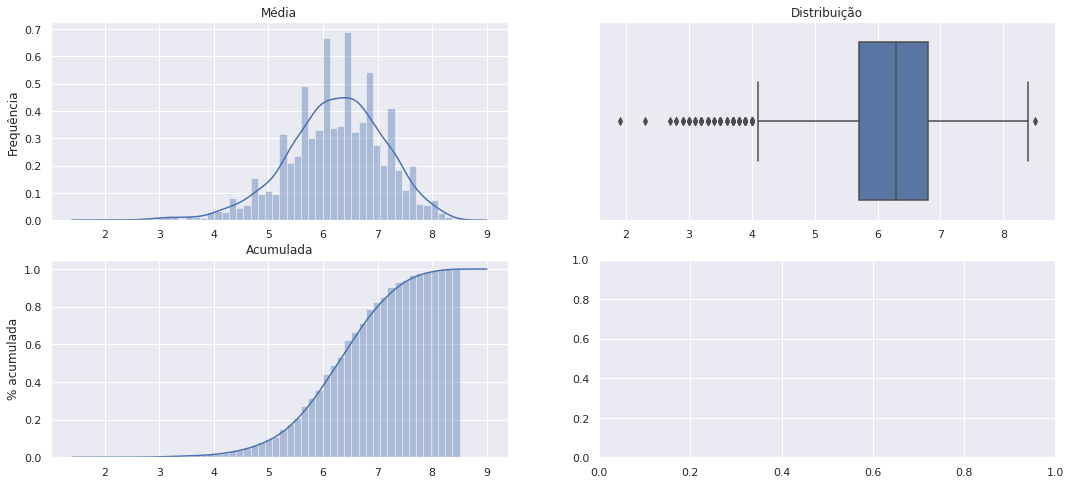

In [294]:
visualizar_graficamente(df_tmdb.vote_average)

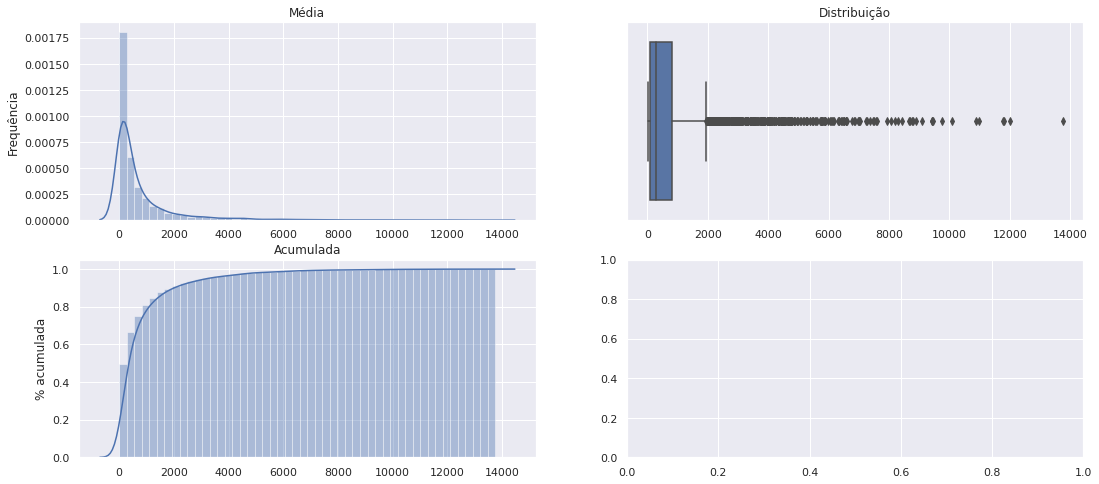

In [295]:
visualizar_graficamente(df_tmdb.vote_count)

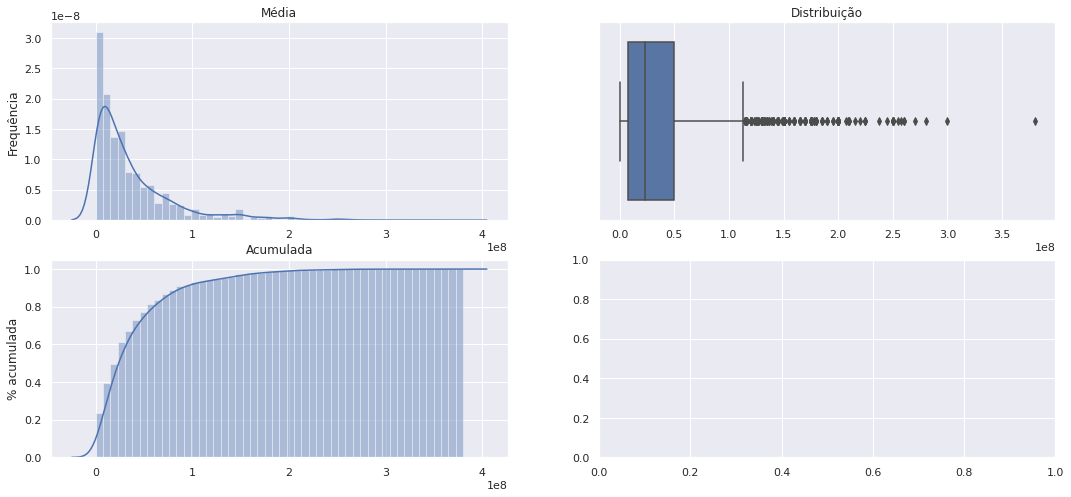

In [296]:
visualizar_graficamente(df_tmdb_raw.query('budget > 0').budget)

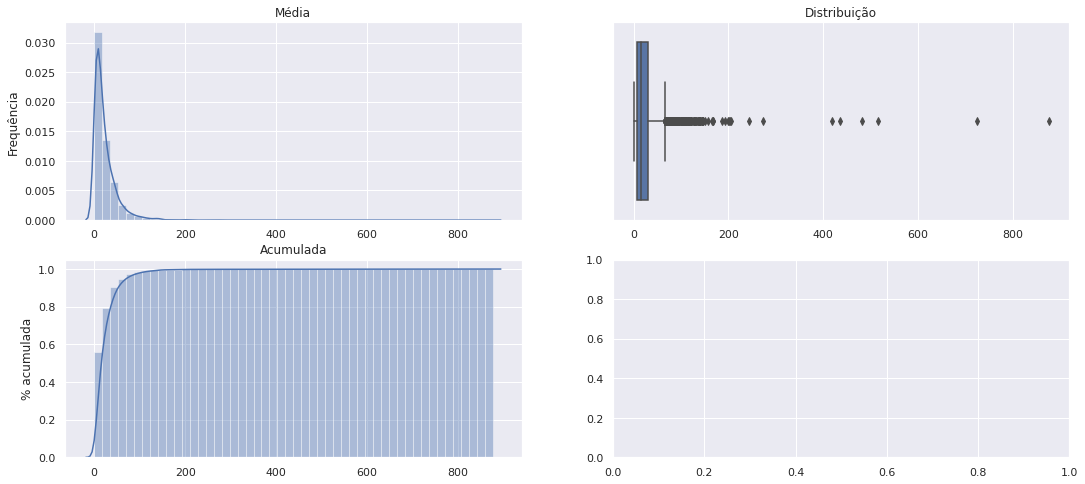

In [297]:
visualizar_graficamente(df_tmdb.popularity)

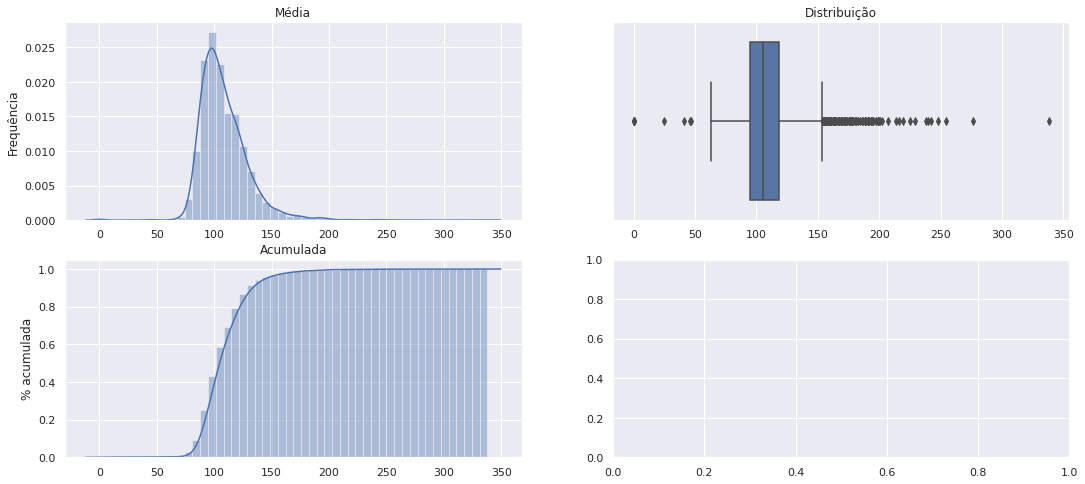

In [298]:
visualizar_graficamente(df_tmdb.runtime)

**Verificando o Ratings**

In [299]:
df_rating_raw.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [300]:
qtde_votos_por_filme = df_rating_raw.groupby('movieId').count()
ratings_filtrado = qtde_votos_por_filme.query('rating >= 10').index
ratings_filtrado

Int64Index([     1,      2,      3,      5,      6,      7,      9,     10,
                11,     12,
            ...
            166461, 166528, 166643, 168250, 168252, 174055, 176371, 177765,
            179819, 187593],
           dtype='int64', name='movieId', length=2269)

In [301]:
nota_media_por_filme = df_rating_raw.groupby('movieId').mean().rating

In [302]:
nota_media_filtrado = nota_media_por_filme.loc[ratings_filtrado]
nota_media_filtrado.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

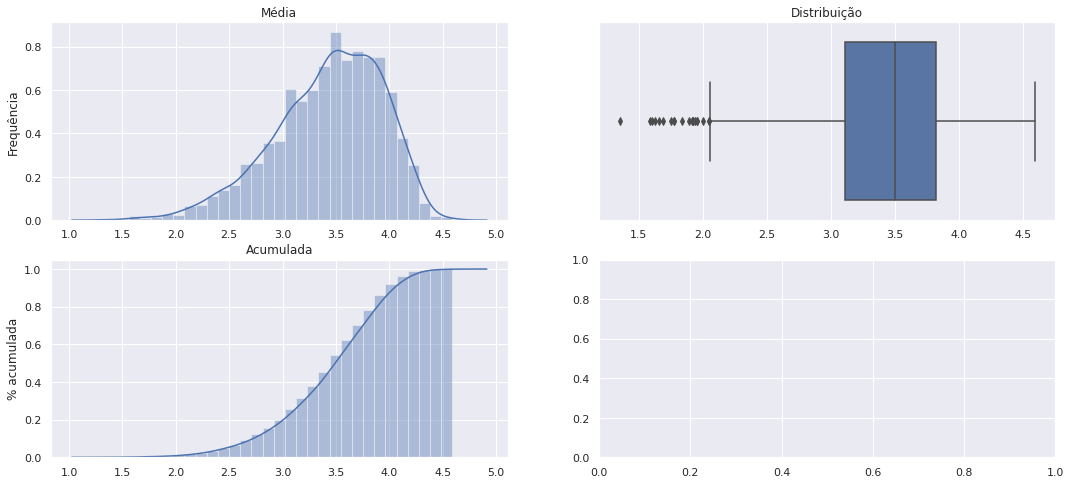

In [303]:
visualizar_graficamente(nota_media_filtrado.values)

**Testes e intervalo de confiança**

In [304]:
print('Média dos filmes com pelo menos 10 votos: %.2f' % nota_media_filtrado.mean())
media_amostra = nota_media_filtrado.mean()

Média dos filmes com pelo menos 10 votos: 3.43


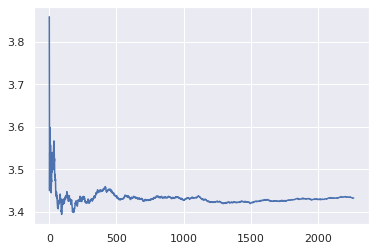

In [305]:
temp = nota_media_filtrado.sample(frac=1)

medias = [temp[0:i].mean() for i in range(1, len(temp))]
plt.plot(medias)

Mas essa média de notas que encontramos para nossa amostra, podemos afirmar que é para toda uma população? Com qual intervalor de confiança?

In [306]:
from statsmodels.stats.weightstats import zconfint
zconfint(nota_media_filtrado)

(3.4112459477469557, 3.452854733323563)

**Vamos ver o filme 1**

In [307]:
df_movie_raw.query('movieId == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [308]:
toy_story = df_rating_raw.query('movieId == 1')
toy_story.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


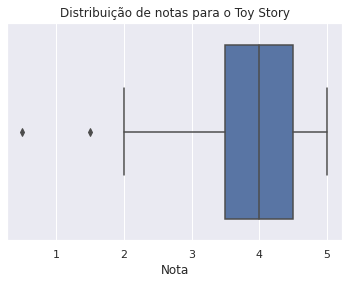

In [309]:
ax = sns.boxplot(toy_story.rating)
ax.set(xlabel = 'Nota')
ax.set_title('Distribuição de notas para o Toy Story')
plt.ioff()

In [310]:
toy_story.rating.mean()

3.9209302325581397

In [311]:
zconfint(toy_story.rating)

(3.8093359183563402, 4.032524546759939)

Caso eu queira fazer um teste estatístico para ver se a media do filme 1 respeita e média da amostra


In [312]:
from statsmodels.stats.weightstats import ztest
ztest(toy_story.rating, value = media_amostra)

(8.586342305916716, 8.978190401886942e-18)

Como o p_value <= 0.05, descartamos a hipótese, ou seja, o filme Toy Story tem a média diferente da média de todos os filmes

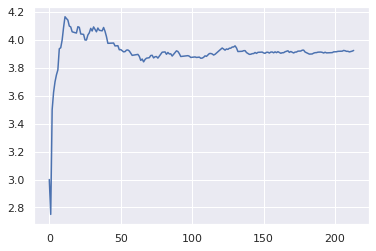

In [313]:
temp = toy_story.sample(frac=1).rating
medias = [temp[0:i].mean() for i in range(1, len(temp))]
plt.plot(medias)

In [314]:
def calcula_test(i):
  media = temp[0:i].mean()
  _, p = ztest(temp[0:i], value = media_amostra)
  return i, media, p

temp = toy_story.sample(frac=1).rating
valores = np.array([calcula_test(i) for i in range(2, len(temp))])

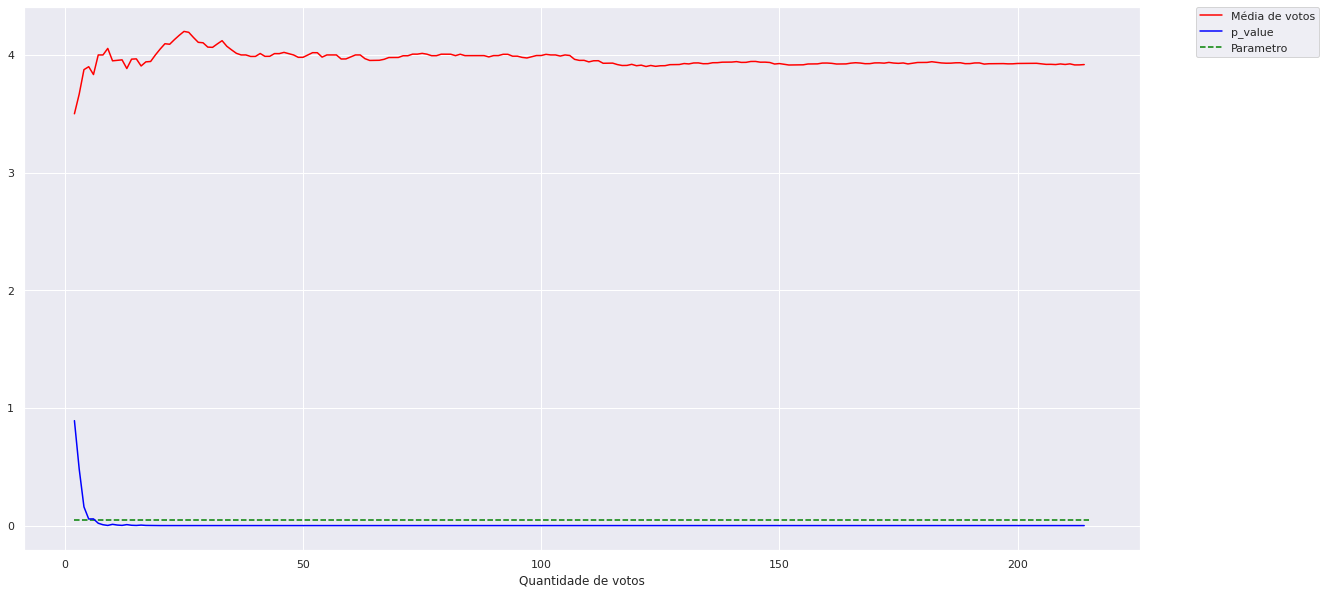

In [315]:
plt.figure(figsize=(20,10))

# Visualizando as médias
plt.plot(valores[:,0], valores[:,1], label='Média de votos', color='red')

# Visualizando o p_value
plt.plot(valores[:,0], valores[:,2], label='p_value', color='blue')

# Parametro para aceitação ou rejeição da hipótese
plt.hlines(y = 0.05, xmin = 2, xmax = len(temp), label='Parametro', color='green', linestyles = '--')

plt.xlabel('Quantidade de votos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.ioff()

Existe diferença entre as médias?

In [316]:
_, p = ztest(toy_story.rating, df_rating_raw.rating)

print('Sim') if p <= .05 else print('Não')

Sim


Quão diferente o Toy Story está da media da amostra?

In [317]:
zconfint(toy_story.rating, df_rating_raw.rating)

(0.2799245129192442, 0.5588219849631111)

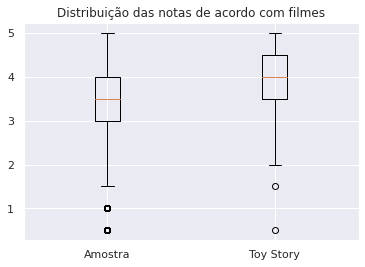

In [318]:
plt.boxplot([df_rating_raw.rating, toy_story.rating], labels=['Amostra', 'Toy Story'])
plt.title('Distribuição das notas de acordo com filmes')
plt.ioff()

**Comparando a média de dois filmes**

In [319]:
df_movie_raw.query('movieId in [1, 593, 72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


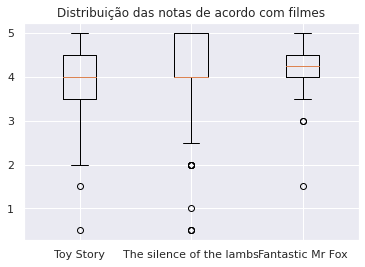

In [320]:
notas_00001 = df_rating_raw.query('movieId == 1')
notas_00593 = df_rating_raw.query('movieId == 593')
notas_72226 = df_rating_raw.query('movieId == 72226')

plt.boxplot([notas_00001.rating, notas_00593.rating, notas_72226.rating], labels=['Toy Story', 'The silence of the lambs', 'Fantastic Mr Fox'])
plt.title('Distribuição das notas de acordo com filmes')
plt.ioff()

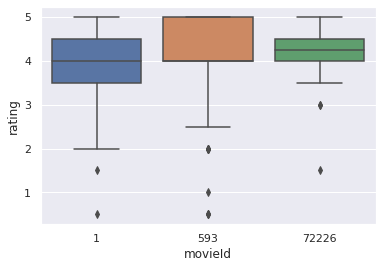

In [321]:
sns.boxplot(data = df_rating_raw.query('movieId in (1, 593, 72226)'), x = 'movieId', y='rating')
plt.ioff()

In [322]:
from statsmodels.stats.weightstats import DescrStatsW

descr_00001 = DescrStatsW(notas_00001.rating)
descr_00593 = DescrStatsW(notas_00593.rating)
descr_72226 = DescrStatsW(notas_72226.rating)

In [323]:
comparacao = descr_00001.get_compare(descr_00593)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [324]:
comparacao = descr_00001.get_compare(descr_72226)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


In [325]:
comparacao = descr_00593.get_compare(descr_72226)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0780,0.208,0.374,0.708,-0.332,0.488


In [326]:
from scipy.stats import normaltest

normaltest(notas_00001.rating)

NormaltestResult(statistic=18.220369223286593, pvalue=0.00011053430732728716)

Não é uma normal devido ao p_value > 0.05

In [327]:
from scipy.stats import ranksums

ranksums(notas_00001.rating, notas_00593.rating)

RanksumsResult(statistic=-3.5930962013771377, pvalue=0.0003267718756440693)